# Image Color Breakdown

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from IPython.display import display_html, display, HTML 
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import urllib
import cv2
import extcolors
from colormap import rgb2hex
import urllib.request 

This is a tool to extract color from an image and visualize the color breakdown. This is useful for looking at art through a new lens. It could also be used as a tool for looking at any digital image, ie. photograph, webpage, graphic design, screenshot. 

### color extraction

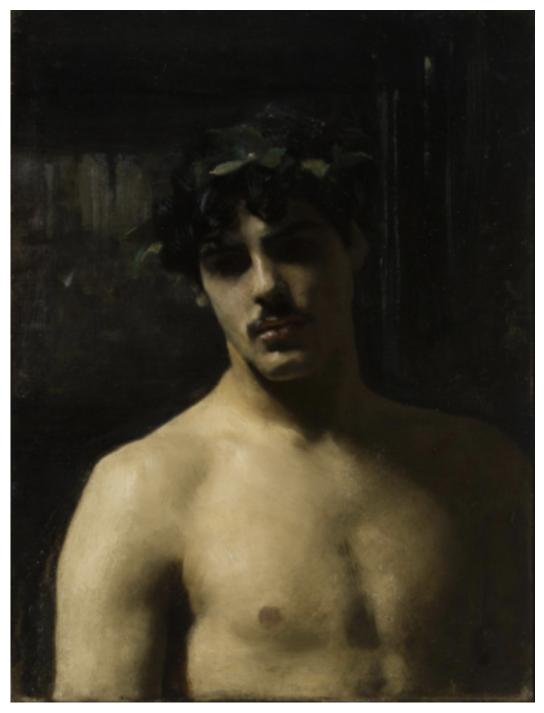

([((17, 17, 15), 277792), ((126, 109, 68), 42723), ((169, 148, 103), 38995), ((81, 69, 40), 25027), ((46, 38, 25), 18670), ((197, 179, 139), 3416), ((137, 137, 135), 1230), ((68, 66, 54), 118), ((171, 166, 154), 66), ((95, 94, 74), 46), ((48, 48, 50), 9), ((126, 128, 102), 4)], 408104)


In [14]:
# For local image
path = "./sargent_man_laurels.png"
output_width = 900
img = Image.open(path)

# Display the image
plt.figure(figsize=(9, 9))
plt.imshow(img)
plt.axis('off')
plt.show()

# Fix for the error: Use extract_from_image instead of extract_from_path when working with PIL Image objects
colors_x = extcolors.extract_from_image(img, tolerance=12, limit=12)
# Alternatively, you could use the path directly:
# colors_x = extcolors.extract_from_path(path, tolerance=12, limit=12)

print(colors_x)

In [15]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
                                            
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")), int(i.split(", ")[1]), int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
                           
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code', 'occurrence'])
    return df
                           
df_color = color_to_df(colors_x)
#df_color = df_color.sort_values('occurrence', ascending=False)

df_color

,c_code,occurrence
0,#11110F,277792
1,#7E6D44,42723
2,#A99467,38995
3,#514528,25027
4,#2E2619,18670
5,#C5B38B,3416
6,#898987,1230
7,#444236,118
8,#ABA69A,66
9,#5F5E4A,46


In [16]:
# Create color list
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurrence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]

# Sort data by occurrence (descending)
df_color = df_color.sort_values('occurrence', ascending=False)

# Extract colors and occurrence values
list_color = list(df_color['c_code'])
list_occurrence = [int(i) for i in list(df_color['occurrence'])]

# Calculate percentages
total_pixels = sum(list_occurrence)
percentages = [round(count*100/total_pixels, 1) for count in list_occurrence]

### Visualizations:

#### Circle pie chart

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=556x734 at 0x107C08F70>


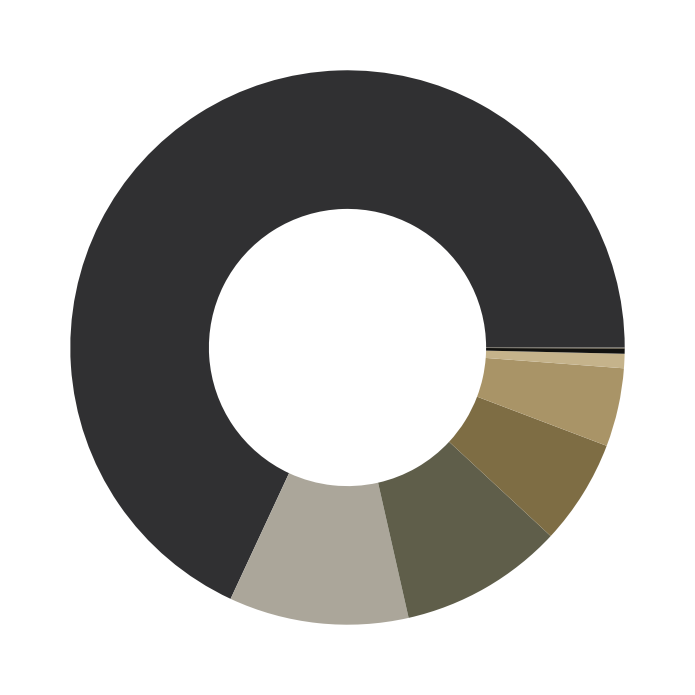

In [18]:
# Circle pie chart
fig, ax = plt.subplots(figsize=(90,90),dpi=10)

wedges, text = ax.pie(list_precent, colors = list_color)
plt.setp(wedges, width = 0.5)
ax.set_aspect("equal")
fig.set_facecolor('white')
print(img)
plt.show()

#### Horizontal Bar Chart

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=556x734 at 0x107C08F70>


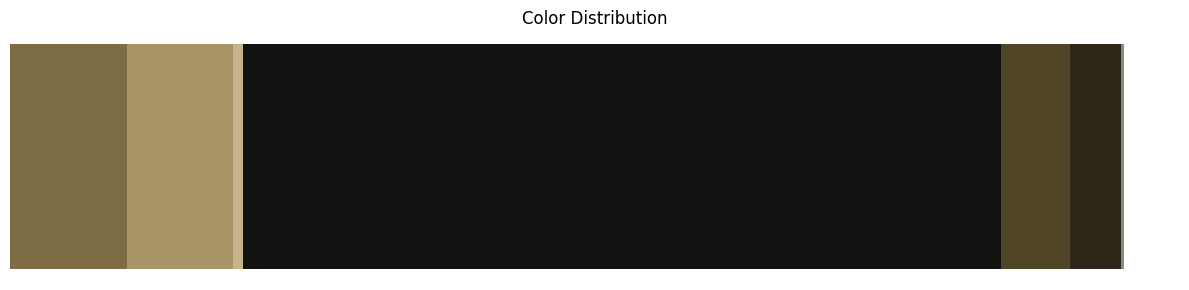

In [19]:
# Horizontal stacked bar chart 
fig, ax = plt.figure(figsize=(12, 3)), plt.subplot(111)

left = 0
for i, (color, width) in enumerate(zip(list_color, list_occurrence)):
    ax.barh(0, width, left=left, color=color, height=1)
    
    left += width

# Remove ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])

plt.title('Color Distribution')

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
print(img)
plt.show()